# Visualizing computational graphs with Nanograd

Nanograd allows you to visualize forward and backward computational graphs. This is particularly useful to understand how an auto-differentiation engine works. Nanograd allows you to easily plot forward and backward computational graphs by calling the methods **plot_forward()** and **plot_backward()** of the Tensor object. These methods return graphs with the name and the shape of the tensors.

#### What do you mean by forward and backward computational graphs?

A forward computational graph is a visual representation of the operations performed between Tensors. A backward computational graph represents as a graph how the gradient of the root node backpropagates to other nodes of the network. 

### Forward computational graph

In [1]:
from tensor import Tensor
import nn.module as nn

In [2]:
a = Tensor.normal(3, 4, (30, 30, 2), name="a")
b = Tensor.normal(10, 2, (30, 30, 1), name="b")

c = a + b
c.name = 'c'

d = c.relu()
d.name = 'd'

e = c.sigmoid()
e.name = 'e'

f = d * e
f.name = 'f'

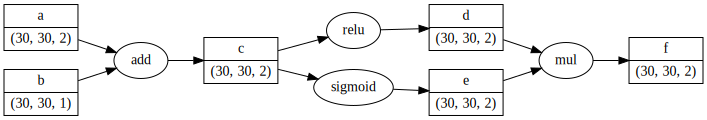

In [3]:
f.plot_forward()

Nanograd displays with GraphViz a DAG with the operations performed on the tensors as well as the names and shapes of the tensors. We can try it in more complex models.

In [7]:
class ConvBobNet(nn.Module):
    def __init__(self):
        super(ConvBobNet, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=(3, 3)),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.ReLU()
        )

        self.block2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.Linear(1014, 10),
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return x

In [8]:
X = Tensor.normal(5, 2, (16, 1, 28, 28), name="input")
Y = Tensor.zeros((16, 1), name="target")
model = ConvBobNet()
loss = nn.CrossEntropyLoss()

# Forward pass
Y_pred = model(X)
Y_pred.name = "preds"

# Loss computation
l = loss(Y_pred, Y)

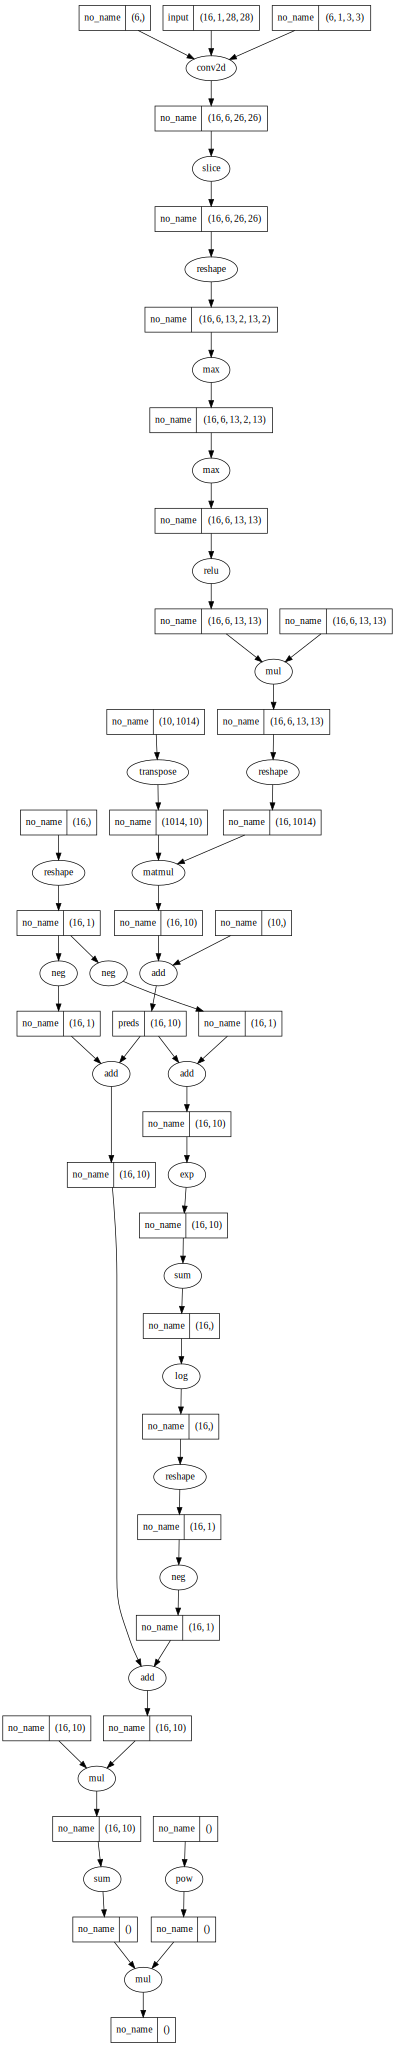

In [9]:
l.plot_forward('TB')

Note the use of the *rankdir* argument used by GraphViz to make a top-to-bottom graph plot. However, it is worth mentionning that Nanograd includes methods suited for model structure visualization.

### Backward computational graph